# PI Analisis exploratorio de datos

In [2]:
#importacion de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data_movies = pd.read_csv('datasets/movies.csv')
data_movies.head(5)

In [3]:
data_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22998 entries, 0 to 22997
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   show_id        22998 non-null  object 
 1   title          22998 non-null  object 
 2   director       14739 non-null  object 
 3   cast           17677 non-null  object 
 4   country        11499 non-null  object 
 5   date_added     13444 non-null  object 
 6   release_year   22998 non-null  int64  
 7   rating         22998 non-null  object 
 8   duration       22516 non-null  object 
 9   listed_in      22998 non-null  object 
 10  description    22994 non-null  object 
 11  ID             22998 non-null  object 
 12  duration_int   22998 non-null  int64  
 13  duration_type  22516 non-null  object 
 14  score          22998 non-null  float64
 15  movie          22998 non-null  int64  
 16  tv show        22998 non-null  int64  
dtypes: float64(1), int64(4), object(12)
memory usage: 

In [ ]:
#valores atipicos en año de estreno

#
def atipicos(columna):
    Q1 = data_movies[columna].quantile(0.25)
    Q3 = data_movies[columna].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data_movies[(data_movies[columna] < Q1 - 1.5*IQR) | (data_movies[columna] > Q3 + 1.5*IQR)]
    if columna != 'score': return (outliers[['title','score','ID',columna]])
    else:return (outliers[['title','ID',columna]])


In [ ]:
#valores atipicos para año de estreno
atipicos('release_year')

In [ ]:
#valores atipicos para la duracion
atipicos('duration_int')

In [ ]:
#valores atipicos para el puntaje
atipico= atipicos('score')
atipico[atipico['score']>5]

                      release_year  duration_int     score     movie  \
release_year              1.000000     -0.133989 -0.003352 -0.163838   
duration_int             -0.133989      1.000000  0.000925  0.773926   
score                    -0.003352      0.000925  1.000000  0.004084   
movie                    -0.163838      0.773926  0.004084  1.000000   
tv show                   0.163838     -0.773926 -0.004084 -1.000000   
description_negative     -0.032785      0.132863  0.005123  0.099554   
description_neutral      -0.019591     -0.053777  0.011115 -0.017939   
description_positive      0.044467     -0.095983 -0.012042 -0.086059   
title_negative           -0.011339     -0.009145  0.004294  0.011544   
title_neutral            -0.007291      0.044378 -0.009498  0.001795   
title_positive            0.019862     -0.047557  0.007987 -0.013103   

                       tv show  description_negative  description_neutral  \
release_year          0.163838             -0.032785      

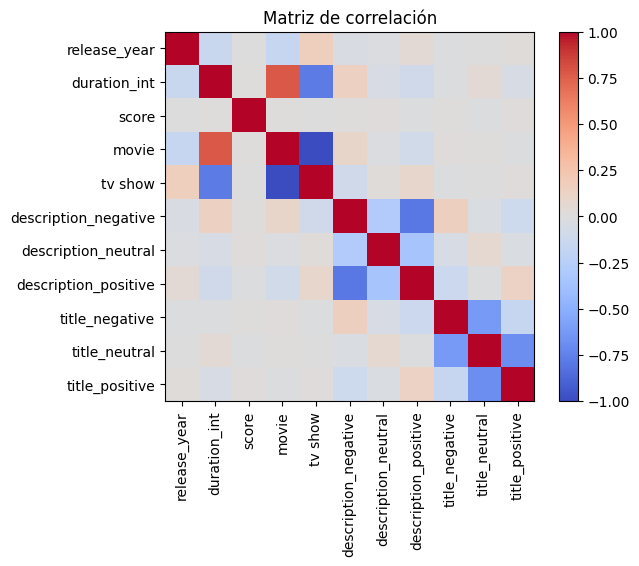

In [9]:
# Creamos la matriz de correlación
correlation_matrix = data_movies.corr()
print(correlation_matrix)
# Graficamos la matriz de correlación
plt.imshow(correlation_matrix, cmap='coolwarm')
plt.colorbar()
plt.xticks(np.arange(len(correlation_matrix)), correlation_matrix.columns, rotation=90)
plt.yticks(np.arange(len(correlation_matrix)), correlation_matrix.columns)
plt.title('Matriz de correlación')
plt.show()


de la matriz de correlacion anterior podemos concluir que la variable "release_year" tiene una correlación negativa débil con la variable "duration_int", lo que sugiere que a medida que aumenta el año de lanzamiento, la duración de la película tiende a disminuir ligeramente.

Además, la variable "duration_int" tiene una correlación positiva fuerte con la variable "movie" y una correlación negativa fuerte con la variable "tv show". Esto sugiere que, en general, las películas tienden a tener una duración más larga que los programas de televisión.

La variable "score" no parece tener una correlación significativa con ninguna de las otras variables en el conjunto de datos.
Además de lo que ya se mencionó, también se puede observar que la correlación entre las variables "movie" y "tv show" es de -1. Esto indica que ambas variables están inversamente relacionadas y que si una variable aumenta su valor, la otra disminuirá en igual medida. En otras palabras, si el valor de la variable "movie" aumenta, el valor de la variable "tv show" disminuirá en la misma proporción. Esto tiene sentido ya que "movie" y "tv show" son mutuamente excluyentes, es decir, una entrada en el conjunto de datos solo puede ser una película o una serie de televisión, no ambas.

             userId    rating  timestamp
userId     1.000000 -0.012329  -0.012385
rating    -0.012329  1.000000   0.017858
timestamp -0.012385  0.017858   1.000000


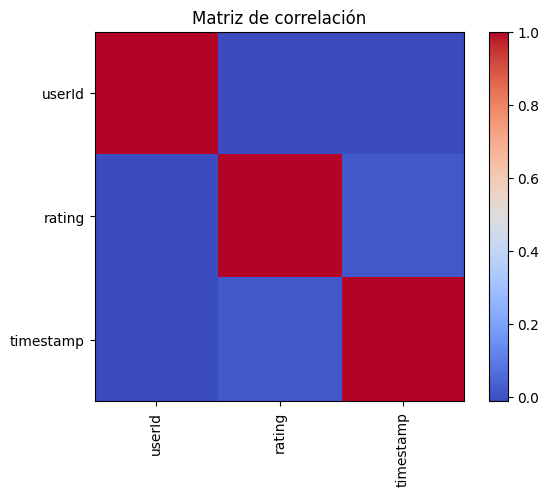

In [3]:
# Creamos la matriz de correlación
Contenido_data = pd.read_csv('datasets/ratings/1.csv')
correlation_matrix = Contenido_data.corr()
print(correlation_matrix)
# Graficamos la matriz de correlación
plt.imshow(correlation_matrix, cmap='coolwarm')
plt.colorbar()
plt.xticks(np.arange(len(correlation_matrix)), correlation_matrix.columns, rotation=90)
plt.yticks(np.arange(len(correlation_matrix)), correlation_matrix.columns)
plt.title('Matriz de correlación')
plt.show()